In [2]:
import os
import sys
sys.path.append(os.pardir)
from dataset.mnist import *

import numpy as np
import matplotlib.pyplot as plt
from simpleDL.model import *
from simpleDL.function_class import *
from simpleDL.function import *
from simpleDL.data import *

## Activation function

### step function

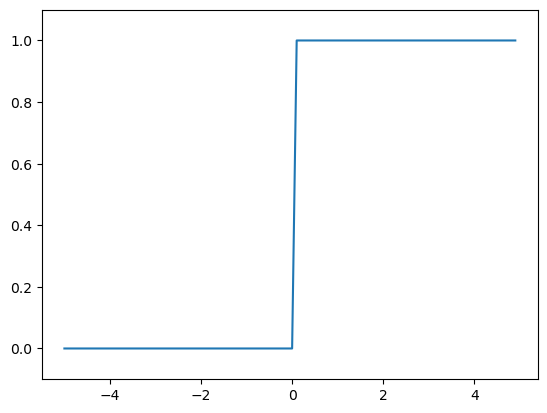

In [3]:
show_function(step_function)

### sigmoid function

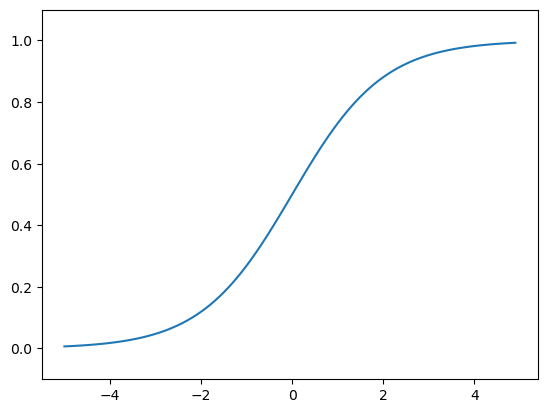

In [4]:
show_function(sigmoid)

### ReLU function

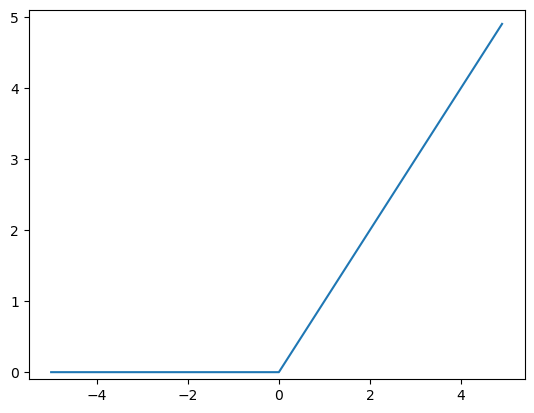

In [5]:
show_function(relu, is_relu=True)

## 3-layer neural network

In [6]:
params1 = ([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]], [0.1, 0.2, 0.3])
params2 = ([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]], [0.1, 0.2])
params3 = ([[0.1, 0.3], [0.2, 0.4]], [0.1, 0.2])

layer1 = DenseLayer(2, 3)
layer2 = DenseLayer(3, 2)
layer3 = DenseLayer(2, 2)

layer1.load_parameter(params1)
layer2.load_parameter(params2)
layer3.load_parameter(params3)


In [7]:
network = Model(
    layer1,
    Sigmoid(),
    layer2,
    Sigmoid(),
    layer3
)
x = np.array([1.0, 0.5])
y = network(x)
print(y)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

In [8]:
softmax(np.array([0.31682708,0.69627909]))

array([0.40625907, 0.59374093])

## MNIST classification

In [9]:
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=True)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [11]:
image = x_train[2]

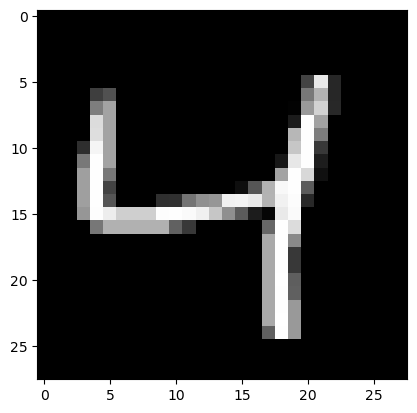

In [12]:
plt.imshow(image.reshape(28, 28), cmap="gray")
plt.show()

In [13]:
with open("../dataset/sample_weight.pkl", "rb") as f:
    sample_weight = pickle.load(f)

In [14]:
sample_weight.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])

In [15]:
print(len(sample_weight["W1"]))
print(len(sample_weight["b1"]))
print(len(sample_weight["W2"]))
print(len(sample_weight["b2"]))
print(len(sample_weight["W3"]))
print(len(sample_weight["b3"]))

784
50
50
100
100
10


In [16]:
params1 = (sample_weight["W1"], sample_weight["b1"])
params2 = (sample_weight["W2"], sample_weight["b2"])
params3 = (sample_weight["W3"], sample_weight["b3"])

layer1 = DenseLayer(784, 50)
layer2 = DenseLayer(50, 100)
layer3 = DenseLayer(100, 10)

layer1.load_parameter(params1)
layer2.load_parameter(params2)
layer3.load_parameter(params3)

In [17]:
model = Model(
    layer1,
    Sigmoid(),
    layer2,
    Sigmoid(),
    layer3
)

In [19]:
print(model)

0. DenseLayer1 : DenseLayer (784, 50) 
1. Function1 : Function
2. DenseLayer2 : DenseLayer (50, 100) 
3. Function2 : Function
4. DenseLayer3 : DenseLayer (100, 10) 



In [20]:
import time
mnist_data = DataLoader(x_test, y_test, 100)

In [21]:
correct_count = 0
start = time.time()
for i in range(len(x_test)):
    y = model(x_test[i])
    p = np.argmax(softmax(y))

    if p == y_test[i]:
        correct_count += 1
end = time.time()

print(correct_count)
print(len(x_test))
print(f"Accuracy : {float(correct_count)/len(x_test)}")
print(f"{end-start} time elapsed")



ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 784 is different from 1)

In [22]:
correct_count = 0
start = time.time()
for x, y in mnist_data:
    predict = model(x)
    p = np.argmax(softmax(predict), axis=1)

    correct_count += np.sum(p==y)


end = time.time()

print(correct_count)
print(len(x_test))
print(f"Accuracy : {float(correct_count)/len(x_test)}")
print(f"{end-start} time elapsed")

9352
10000
Accuracy : 0.9352
0.4176032543182373 time elapsed


In [23]:
def function1(x):
    return 0.01*x**2 + 0.1*x

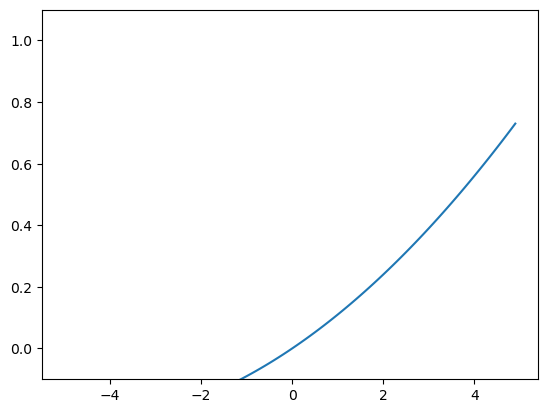

In [24]:
show_function(function1)

In [25]:
numerical_diff(function1, 5)

0.1999999999990898

In [26]:
def function2(x):
    return x[0]**2 + x[1]**2

In [27]:
def numerical_gradient(function, x):
    h = 1e-4
    gradient = np.zeros_like(x)

    for index in range(x.size):
        temp = x[index]
        x[index] = temp + h
        fxh1 = function(x)

        x[index] = temp - h
        fxh2 = function(x)

        gradient[index] = (fxh1 - fxh2) / (2*h)
        x[index] = temp

    return gradient


In [28]:
numerical_gradient(function2, np.array([3.0, 4.0]))

array([6., 8.])

In [29]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function2, init_x, lr=0.1)

array([-6.11110793e-10,  8.14814391e-10])

In [30]:
import os
import sys
sys.path.append(os.pardir)
import time
from dataset.mnist import *

import numpy as np
import matplotlib.pyplot as plt
from simpleDL.model import *
from simpleDL.function_class import *
from simpleDL.function import *
from simpleDL.data import *

In [31]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

In [32]:
network = Model(
    DenseLayer(784, 50),
    Sigmoid(),
    DenseLayer(50, 10)
)

In [33]:
print(network)

0. DenseLayer1 : DenseLayer (784, 50) 
1. Function1 : Function
2. DenseLayer2 : DenseLayer (50, 10) 



In [34]:
epochs = 100
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1


train_acc_list = []
test_acc_list = []
epoch_train_error_list = np.array([])

In [35]:
iter_per_epoch = max(train_size / batch_size, 1)
critic = CrossEntropyLoss()

In [36]:
train_data = DataLoader(x_train, y_train, batch_size=batch_size)
test_data = DataLoader(x_test, y_test, batch_size=batch_size)

In [37]:
start_time = time.time() 
for epoch in range(10):
    train_correct_count = 0
    test_correct_count = 0
    train_loss_list = np.array([])
    for x, y in train_data:
        pred = network(x)
        train_loss = critic(pred, y)
        p = np.argmax(critic.pred, axis=1)
        if y.ndim != 1:
            y = np.argmax(y, axis=1)
        train_loss_list = np.append(train_loss_list, train_loss)
        network._backward(critic)

        grad = network.gradient()
        network._update(learning_rate)

        train_correct_count += np.sum(p==y)


    for x, y in test_data:
        pred = network(x)
        softmax(pred)
        p = np.argmax(pred, axis=1)
        if y.ndim != 1:
            y = np.argmax(y, axis=1)
        test_correct_count += np.sum(p==y)


    train_acc = float(train_correct_count)/len(x_train)
    train_acc_list.append(train_acc)
    test_acc = float(test_correct_count)/len(x_test)
    test_acc_list.append(test_acc)
    total_train_error = np.sum(train_loss_list) / len(x_train)
    epoch_train_error_list = np.append(epoch_train_error_list, total_train_error)
    print(f"train acc : {train_acc}")
    print(f"train loss : {total_train_error}")
    print(f"test acc : {test_acc}")

print('작업 수행된 시간 : %f 초' % (time.time() - start_time))


train acc : 0.8021333333333334
train loss : 0.009247761445158759
test acc : 0.8814
train acc : 0.8892166666666667
train loss : 0.004276549532396017
test acc : 0.902
train acc : 0.9032
train loss : 0.003526881985616449
test acc : 0.9123
train acc : 0.9107833333333333
train loss : 0.003174836284043683
test acc : 0.9166
train acc : 0.9167833333333333
train loss : 0.002944670128818747
test acc : 0.921
train acc : 0.9213166666666667
train loss : 0.002768180890931995
test acc : 0.9263
train acc : 0.9252
train loss : 0.0026214064476567578
test acc : 0.9288
train acc : 0.9282833333333333
train loss : 0.0024943324965887815
test acc : 0.9315
train acc : 0.9315333333333333
train loss : 0.0023818806291781244
test acc : 0.9349
train acc : 0.9347833333333333
train loss : 0.002281008630323196
test acc : 0.9367
작업 수행된 시간 : 34.537665 초


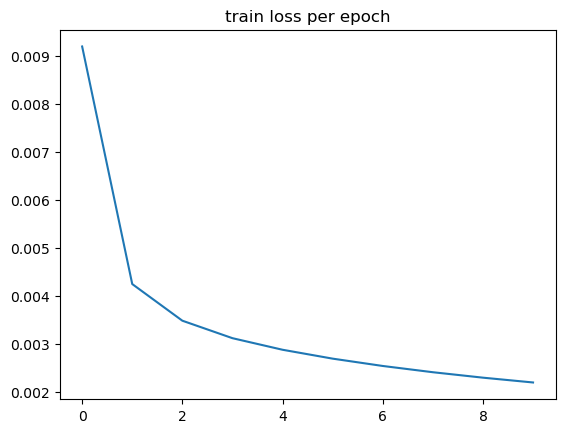

In [11]:
plt.plot(epoch_train_error_list)
plt.title("train loss per epoch")
plt.show()